# Perceptron

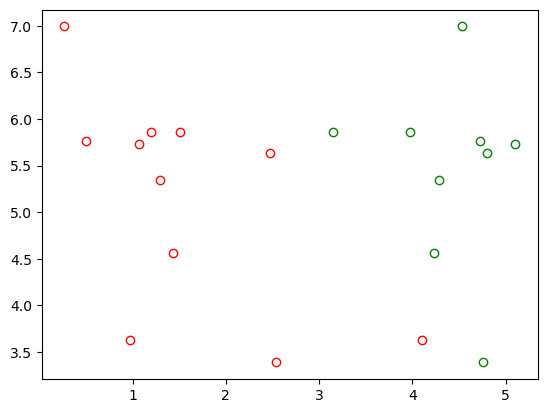

In [36]:
from matplotlib import pyplot as plt
import numpy as np

f = open('data.csv')
data = []

# consume the header line
f.readline()

# read and parse the lines
for line in f:
    (x1,x2,y) = line.split(',')
    x1 = float(x1)
    x2 = float(x2)
    y = int(y)
    data.append((x1,x2,y))
    
plt.plot([x1 for (x1,x2,y) in data if y==0], [x2 for (x1,x2,y) in data if y==0], 'o', mec='r', mfc='none')
plt.plot([x1 for (x1,x2,y) in data if y==1], [x2 for (x1,x2,y) in data if y==1], 'o', mec='g', mfc='none');

In [37]:
class Point:

    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __str__(self):
        return('Punto di coordinate  (%f,%f)' % (self.x,self.y))

class Line:

    def __init__(self,a,b,c):
        self.a = a
        self.b = b
        self.c = c

    def __str__(self):
        return('Retta di equazione %f x1 + %f x2 + %f = 0' % (self.a,self.b,self.c))

    def Esplicita(self):
        if self.b == 0:
            print('Retta verticale!')
        else:
            m = -self.a/self.b
            q = -self.c/self.b
            return(m,q)

    def Aggiorna(self,x1,x2,y):
        self.a += y*x1
        self.b += y*x2
        self.c += y

    def Disegna(self,xmin=0,xmax=5):
        [m,q] = self.Esplicita()
        x = np.linspace(xmin,xmax,20)
        plt.plot(x,m*x+q)

In [38]:
def distanza(p,r):
    d = (np.abs(r.a * p.x +r.b * p.y + r.c) / np.sqrt(r.a**2+r.b**2))
    return(d)

def draw(p,r,xmin=-5,xmax=5,label=''):
    [m,q] = r.Esplicita()
    x = np.linspace(xmin,xmax,20)
    plt.plot(x,m*x+q,label=label)
    plt.plot(p.x,p.y,'o',mec='r')
    plt.legend()

def predict(p,r):
    if r.a * p.x +r.b * p.y + r.c < 0:
        t = 0
    else:
        t = 1
    return(t)

In [39]:
P = Point(data[0][0],data[0][1]); y = data[0][2]

In [40]:
l = Line(0,0,0)

In [41]:
t = predict(P,l); t

1

In [42]:
if y == 0:
    y = -1
l.Aggiorna(P.x,P.y,y)
t = predict(P,l); t

0

In [43]:
print(l)

Retta di equazione -0.494600 x1 + -5.766100 x2 + -1.000000 = 0


In [53]:
def fit(data):
    l = Line(0,0,0)
    ok = 1
    while ok == 1:
        for (x1,x2,y) in data:
            P = Point(x1,x2)
            t = predict(P,l)
            if t != y:
                if y == 0:
                    y = -1
                l.Aggiorna(P.x,P.y,y)
                ok = 1
                break
            else:
                ok = 0
    return(l)

In [54]:
l=fit(data)

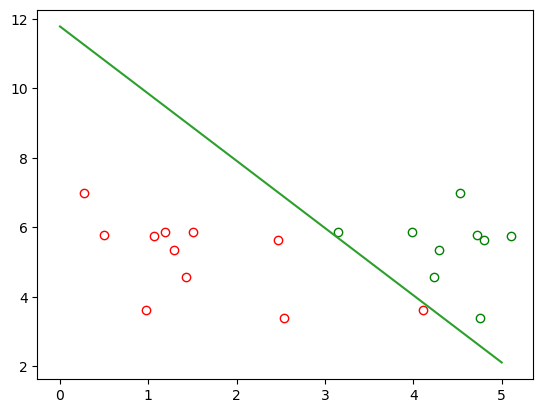

In [55]:
plt.plot([x1 for (x1,x2,y) in data if y==0], [x2 for (x1,x2,y) in data if y==0], 'o', mec='r', mfc='none')
plt.plot([x1 for (x1,x2,y) in data if y==1], [x2 for (x1,x2,y) in data if y==1], 'o', mec='g', mfc='none')
l.Disegna()